# Experimentos baseados em Deep Learning

- Utilizando cada paredão como teste e avaliando com holdout.

In [1]:
import pandas as pd 
import numpy as np 
from regression_utils import *
import fastai
from fastai.tabular import *

In [2]:
NORMALIZE = False
EPOCHS = 30
LAYERS = [15, 15]
LR = 5e-2
DEVICE="TODO"

In [3]:
REMOVE = ["positivos", "neutros", "negativos", "likes", "retweets", "day2", "day3"]

In [4]:
summary_df = pd.DataFrame(columns=set(COLUMNS) - set(REMOVE))

# Paredao 1

In [5]:
train_df, test_df = get_train_test(1, normalize=NORMALIZE, drop_columns=REMOVE)

In [6]:
test_df

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
24,1,bianca_andrade,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,411880,0.2446
25,1,lucas_chumbo,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,12014,0.7594


In [7]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=3)

In [8]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [9]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


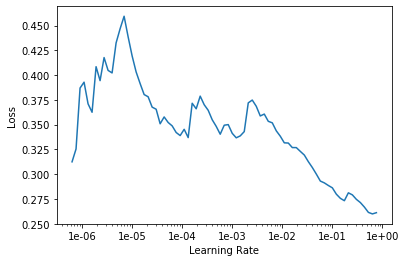

In [10]:
learner.recorder.plot()

In [11]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.369402,0.081850,0.081850,00:00
1,0.332310,0.115863,0.115863,00:00
2,0.270872,0.125227,0.125227,00:00
3,0.235299,0.073292,0.073292,00:00
4,0.206658,0.046251,0.046251,00:00
5,0.180939,0.191003,0.191003,00:00
6,0.158221,0.032436,0.032436,00:00
7,0.149507,0.157269,0.157269,00:00
8,0.136602,0.063682,0.063682,00:00
9,0.128810,0.071347,0.071347,00:00


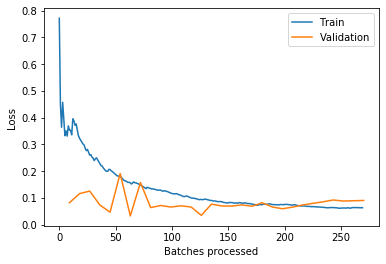

In [12]:
learner.recorder.plot_losses()

In [13]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [14]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [15]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
25,1,lucas_chumbo,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,12014,0.7594,0.411445
24,1,bianca_andrade,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,411880,0.2446,0.175727


# Paredao 2

In [16]:
train_df, test_df = get_train_test(2, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
20,2,babu,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,325345,0.0044
21,2,petrix,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,22414,0.8027
22,2,pyong,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,1431039,0.0066
23,2,hadson,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,10207,0.1863


In [17]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [18]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [19]:
learner.fit_one_cycle(EPOCHS, LR)


epoch,train_loss,valid_loss,mean_squared_error,time
0,0.226556,0.124203,0.124203,00:00
1,0.146618,0.156082,0.156082,00:00
2,0.150749,0.195739,0.195739,00:00
3,0.133709,0.042485,0.042485,00:00
4,0.123926,0.013820,0.013820,00:00
5,0.118361,0.011054,0.011054,00:00
6,0.110818,0.057030,0.057030,00:00
7,0.107001,0.038340,0.038340,00:00
8,0.098473,0.074656,0.074656,00:00
9,0.093928,0.033584,0.033584,00:00


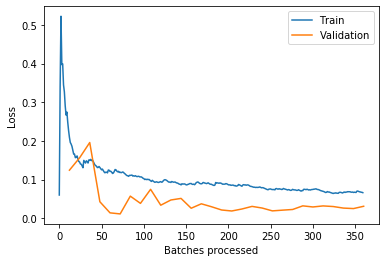

In [20]:
learner.recorder.plot_losses()

In [21]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [22]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [23]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
23,2,hadson,0.147875,0.309531,0.542595,0.261447,0.333499,0.405312,25263,10207,0.1863,0.391493
21,2,petrix,0.146594,0.339433,0.513974,0.316781,0.446991,0.469254,46679,22414,0.8027,0.389119
20,2,babu,0.300946,0.397872,0.301182,0.067775,0.054604,0.028657,5606,325345,0.0044,-0.018933
22,2,pyong,0.414681,0.316993,0.268326,0.353997,0.164906,0.096777,12527,1431039,0.0066,-0.041097


# Paredao 3

In [24]:
train_df, test_df = get_train_test(3, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
9,3,felipe_prior,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,204031,0.2029
10,3,hadson,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,10207,0.7971


In [25]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)

In [26]:
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [27]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.541208,0.283581,0.283581,00:00
1,0.349149,0.216988,0.216988,00:00
2,0.285608,0.550301,0.550301,00:00
3,0.226875,0.111938,0.111938,00:00
4,0.182017,0.082077,0.082077,00:00
5,0.151394,0.082497,0.082497,00:00
6,0.131913,0.086247,0.086247,00:00
7,0.116944,0.015841,0.015841,00:00
8,0.108162,0.154410,0.154410,00:00
9,0.107168,0.029550,0.029550,00:00


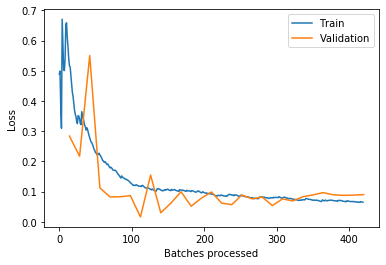

In [28]:
learner.recorder.plot_losses()

In [29]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [30]:

test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [31]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
10,3,hadson,0.208189,0.437694,0.354117,0.45356,0.570701,0.531529,1903,10207,0.7971,0.337913
9,3,felipe_prior,0.281135,0.369039,0.349826,0.54644,0.429299,0.468471,1138,204031,0.2029,0.283400


# Paredao 4

In [32]:
train_df, test_df = get_train_test(4, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
29,4,babu,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,325345,0.0130
30,4,victor_hugo,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,14399,0.3608
31,4,lucas,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,23670,0.6262


In [33]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [34]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.452705,0.096553,0.096553,00:00
1,0.297181,0.095076,0.095076,00:00
2,0.236674,0.104103,0.104103,00:00
3,0.196948,0.114046,0.114046,00:00
4,0.179324,0.051047,0.051047,00:00
5,0.153080,0.037954,0.037954,00:00
6,0.135116,0.042795,0.042795,00:00
7,0.134195,0.054533,0.054533,00:00
8,0.136041,0.056685,0.056685,00:00
9,0.125413,0.085940,0.085940,00:00


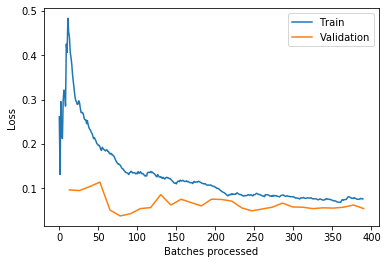

In [35]:
learner.recorder.plot_losses()

In [36]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [37]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [38]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
31,4,lucas,0.197421,0.291340,0.511239,0.559781,0.538845,0.570026,32223,23670,0.6262,0.432617
29,4,babu,0.185986,0.297259,0.516754,0.311138,0.324375,0.339940,18271,325345,0.0130,0.386676
30,4,victor_hugo,0.227361,0.369350,0.403289,0.129081,0.136781,0.090035,6845,14399,0.3608,0.297367


# Paredao 5

In [39]:
train_df, test_df = get_train_test(5, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
3,5,bianca_andrade,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,411880,0.5309
4,5,flayslene,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,104138,0.1764
5,5,felipe_prior,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,204031,0.2927


In [40]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [41]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.435523,0.151863,0.151863,00:00
1,0.290189,0.090362,0.090362,00:00
2,0.253880,0.081679,0.081679,00:00
3,0.201931,0.101470,0.101470,00:00
4,0.165791,0.225901,0.225901,00:00
5,0.144989,0.154759,0.154759,00:00
6,0.123678,0.167117,0.167117,00:00
7,0.113222,0.130753,0.130753,00:00
8,0.106065,0.298200,0.298200,00:00
9,0.109526,0.193927,0.193927,00:00


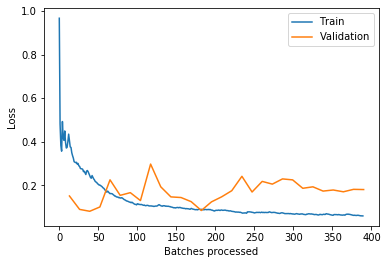

In [42]:
learner.recorder.plot_losses()

In [43]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [44]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [45]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
4,5,flayslene,0.181474,0.328450,0.490076,0.201575,0.192263,0.193832,1935,104138,0.1764,0.425256
5,5,felipe_prior,0.146252,0.282867,0.570881,0.427559,0.435797,0.594268,3101,204031,0.2927,0.405293
3,5,bianca_andrade,0.221844,0.422179,0.355977,0.370866,0.371940,0.211900,1998,411880,0.5309,0.364959


# Paredao 6

In [46]:
train_df, test_df = get_train_test(6, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
0,6,gizelly_bicalho,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,234977,0.0064
1,6,guilherme,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,103421,0.5607
2,6,pyong,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,1431039,0.4329


In [47]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [48]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.477785,0.786501,0.786501,00:00
1,0.377297,0.513666,0.513666,00:00
2,0.312043,0.416575,0.416575,00:00
3,0.270870,0.409180,0.409180,00:00
4,0.215701,0.751473,0.751473,00:00
5,0.185090,0.432557,0.432557,00:00
6,0.158313,0.080444,0.080444,00:00
7,0.141753,0.230784,0.230784,00:00
8,0.129893,0.156304,0.156304,00:00
9,0.122653,0.241973,0.241973,00:00


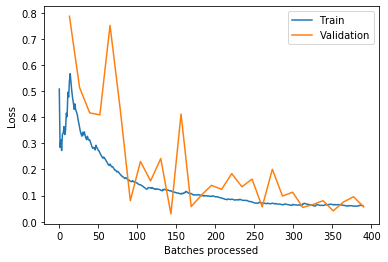

In [49]:
learner.recorder.plot_losses()

In [50]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [51]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [52]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
1,6,guilherme,0.152063,0.253358,0.594579,0.258715,0.344924,0.452061,49438,103421,0.5607,0.364343
2,6,pyong,0.209643,0.271063,0.519294,0.398546,0.412345,0.441168,38968,1431039,0.4329,0.324720
0,6,gizelly_bicalho,0.387272,0.342758,0.269970,0.342739,0.242732,0.106771,20904,234977,0.0064,0.187020


# Paredao 7

In [53]:
train_df, test_df = get_train_test(7, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
6,7,babu,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,325345,0.0460
7,7,manu_gavassi,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,4327060,0.1018
8,7,victor_hugo,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,14399,0.8522


In [54]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [55]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.424289,0.023197,0.023197,00:00
1,0.285705,0.114767,0.114767,00:00
2,0.226179,0.199064,0.199064,00:00
3,0.214451,0.120348,0.120348,00:00
4,0.200382,0.022470,0.022470,00:00
5,0.172035,0.004103,0.004103,00:00
6,0.154962,0.024060,0.024060,00:00
7,0.138439,0.210583,0.210583,00:00
8,0.128393,0.068436,0.068436,00:00
9,0.113458,0.181761,0.181761,00:00


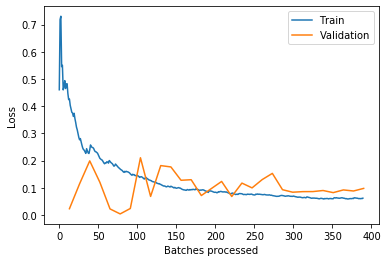

In [56]:
learner.recorder.plot_losses()

In [57]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [58]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [59]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
6,7,babu,0.318519,0.299199,0.382283,0.456325,0.382861,0.434205,19044,325345,0.0460,0.326872
8,7,victor_hugo,0.205263,0.359956,0.434781,0.179353,0.280923,0.301188,14217,14399,0.8522,0.307098
7,7,manu_gavassi,0.339061,0.350323,0.310616,0.364322,0.336216,0.264607,13372,4327060,0.1018,0.288522



# Paredao 8

In [60]:
train_df, test_df = get_train_test(8, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
17,8,babu,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,325345,0.4771
18,8,rafa,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,293473,0.0059
19,8,pyong,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,1431039,0.5170


In [61]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [62]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.196214,0.313603,0.313603,00:00
1,0.212594,0.243827,0.243827,00:00
2,0.154819,0.204184,0.204184,00:00
3,0.136321,0.241357,0.241357,00:00
4,0.120635,0.199110,0.199110,00:00
5,0.108165,0.187505,0.187505,00:00
6,0.108801,0.247221,0.247221,00:00
7,0.107186,0.148358,0.148358,00:00
8,0.104568,0.160657,0.160657,00:00
9,0.111370,0.186070,0.186070,00:00


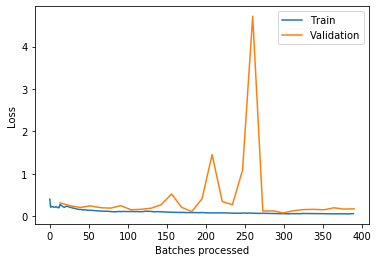

In [63]:
learner.recorder.plot_losses()

In [64]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()


In [65]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [66]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
19,8,pyong,0.211414,0.343538,0.445048,0.426107,0.479374,0.402191,42474,1431039,0.5170,0.413648
17,8,babu,0.238800,0.296049,0.465150,0.366229,0.314337,0.319854,29102,325345,0.4771,0.313476
18,8,rafa,0.184500,0.264728,0.550772,0.207663,0.206290,0.277956,27062,293473,0.0059,0.169376


# Paredão 9

In [67]:
train_df, test_df = get_train_test(9, normalize=NORMALIZE, drop_columns=REMOVE)
test_df


,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
14,9,daniel,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,33876,0.8082
15,9,flayslene,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,104138,0.0954
16,9,ivy,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,59125,0.0964


In [68]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [69]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.806919,0.142536,0.142536,00:00
1,0.580656,0.108819,0.108819,00:00
2,0.404893,0.072032,0.072032,00:00
3,0.298579,0.258402,0.258402,00:00
4,0.240137,0.037564,0.037564,00:00
5,0.200676,0.095980,0.095980,00:00
6,0.185154,0.143598,0.143598,00:00
7,0.163583,0.205823,0.205823,00:00
8,0.149099,0.097259,0.097259,00:00
9,0.132309,0.105675,0.105675,00:00


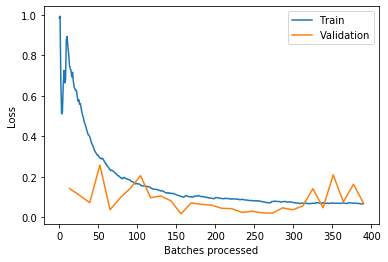

In [70]:
learner.recorder.plot_losses()

In [71]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [72]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [73]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
14,9,daniel,0.210559,0.351664,0.437777,0.355075,0.417310,0.397548,43662,33876,0.8082,0.423899
16,9,ivy,0.228849,0.342627,0.428523,0.269045,0.283453,0.271294,34835,59125,0.0964,0.291906
15,9,flayslene,0.265438,0.300293,0.434269,0.375880,0.299236,0.331158,14010,104138,0.0954,0.275883


# Paredão 10

In [74]:
train_df, test_df = get_train_test(10, normalize=NORMALIZE, drop_columns=REMOVE)
test_df

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao
11,10,manu_gavassi,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,4785334,0.4251
12,10,mari,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,269733,0.0076
13,10,felipe_prior,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,642881,0.5673


In [75]:
paredoes_db = TabularDataBunch.from_df("", df=train_df.drop(["paredao", "nome"], axis=1),
                                      dep_var="rejeicao", 
                                      valid_idx=np.unique(np.random.choice(len(train_df.index), 3)), 
                                      procs=[Normalize],
                                      test_df=test_df.drop(["paredao", "nome"], axis=1),
                                      bs=2)
learner = tabular_learner(paredoes_db, layers=LAYERS, metrics=[mse])

In [76]:
learner.fit_one_cycle(EPOCHS, LR)

epoch,train_loss,valid_loss,mean_squared_error,time
0,0.283130,0.056017,0.056017,00:00
1,0.214655,0.453744,0.453744,00:00
2,0.208076,0.284826,0.284826,00:00
3,0.183328,0.583997,0.583997,00:00
4,0.167129,3.814746,3.814746,00:00
5,0.163530,0.237187,0.237187,00:00
6,0.147174,0.250716,0.250716,00:00
7,0.132271,0.637095,0.637095,00:00
8,0.130338,0.253992,0.253992,00:00
9,0.122814,0.218425,0.218425,00:00


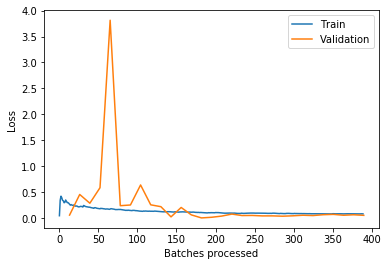

In [77]:
learner.recorder.plot_losses()

In [78]:
aux = learner.get_preds(ds_type=DatasetType.Test)
predictions = aux[0].squeeze().tolist()

In [79]:
test_df["predicao"] = predictions
summary_df = summary_df.append(test_df, ignore_index=True, sort=False)

In [80]:
test_df.sort_values(by="predicao", ascending=False)

,paredao,nome,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,seguidores,rejeicao,predicao
11,10,manu_gavassi,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,4785334,0.4251,0.908757
13,10,felipe_prior,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,642881,0.5673,0.680460
12,10,mari,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,269733,0.0076,0.311608


# Sumarizando

In [81]:
summary_df

,positivos_global_pct,paredao,negativos_individual_pct,neutros_global_pct,nome,positivos_individual_pct,day1,negativos_global_pct,neutros_individual_pct,rejeicao,seguidores,predicao
0,0.483052,1,0.266922,0.326345,bianca_andrade,0.361998,5849,0.207010,0.371080,0.2446,411880,0.175727
1,0.516948,1,0.469919,0.673655,lucas_chumbo,0.178042,22759,0.792990,0.352040,0.7594,12014,0.411445
2,0.067775,2,0.301182,0.054604,babu,0.300946,5606,0.028657,0.397872,0.0044,325345,-0.018933
3,0.316781,2,0.513974,0.446991,petrix,0.146594,46679,0.469254,0.339433,0.8027,22414,0.389119
4,0.353997,2,0.268326,0.164906,pyong,0.414681,12527,0.096777,0.316993,0.0066,1431039,-0.041097
5,0.261447,2,0.542595,0.333499,hadson,0.147875,25263,0.405312,0.309531,0.1863,10207,0.391493
6,0.546440,3,0.349826,0.429299,felipe_prior,0.281135,1138,0.468471,0.369039,0.2029,204031,0.283400
7,0.453560,3,0.354117,0.570701,hadson,0.208189,1903,0.531529,0.437694,0.7971,10207,0.337913
8,0.311138,4,0.516754,0.324375,babu,0.185986,18271,0.339940,0.297259,0.0130,325345,0.386676
9,0.129081,4,0.403289,0.136781,victor_hugo,0.227361,6845,0.090035,0.369350,0.3608,14399,0.297367
